# Example Functor
<hr style="border-top-width: 4px; border-top-color: #34609b;">
Tutorial illustrating how creating a TF1 class using functor or class member functions

can be run with:

```cpp
 root > .x exampleFunctor.C
 root > .x exampleFunctor.C+ with ACLIC
```




**Author:** Lorenzo Moneta  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-mirror/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer (Beta)</a> from the macro found in the ROOT repository  on Thursday, January 19, 2017 at 04:32 PM.</small></i>

In [1]:
%%cpp -d
#include "TF1.h"
#include "TMath.h"
#include "TLegend.h"

Function object (functor)

In [2]:
struct MyDerivFunc {
   MyDerivFunc(TF1 * f): fFunc(f) {}
   double operator() (double *x, double * )  const {
      return fFunc->Derivative(*x);
   }
   TF1 * fFunc;
};

Function class with a member function

In [3]:
struct MyIntegFunc {
   MyIntegFunc(TF1 * f): fFunc(f) {}
   double Integral (double *x, double * ) const {
      double a = fFunc->GetXmin();
      return fFunc->Integral(a, *x);
   }
   TF1 * fFunc;
};

 A helper function is created: 

In [4]:
%%cpp -d
double MyFunc (double *x, double *p ) {
   return TMath::Gaus(x[0],p[0],p[1] );
}

In [5]:
double xmin = -10;  double xmax = 10;

Create tf1 using a free c function

In [6]:
TF1 * f1 = new TF1("f1",MyFunc,xmin,xmax,2);
f1->SetParameters(0.,1.);
f1->SetMaximum(3);   f1->SetMinimum(-1);
f1->Draw();

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


Derivative function
 example to create TF1 using a functor

In order to work with interpreter the function object must be created and lived all time for all time
 of the TF1. In compiled mode, the function object can be passed by value (recommended) and there
 is also no need to specify the type of the function class. Example is as follows:

 `TF1 * f2 = new TF1("f2",MyDerivFunc(f1), xmin, xmax,0); // only for C++ compiled mode`

In [7]:
MyDerivFunc * deriv = new MyDerivFunc(f1);
TF1 * f2 = new TF1("f2",deriv, xmin, xmax, 0);

f2->SetLineColor(kBlue);
f2->Draw("same");

Integral function
 example to create a TF1 using a member function of a user class

In order to work with interpreter the function object must be created and lived all time for all time
 of the TF1. In compiled mode there is no need to specify the type of the function class and the name
 of the member function

 `TF1 * f3 = new TF1("f3",intg,&MyIntegFunc::Integral,xmin,xmax, 0); // only for C++ compiled mode`

In [8]:
MyIntegFunc * intg = new MyIntegFunc(f1);
TF1 * f3 = new TF1("f3",intg,&MyIntegFunc::Integral, xmin, xmax, 0);

f3->SetLineColor(kRed);
f3->Draw("same");

TLegend * l = new TLegend(0.78, 0.25, 0.97 ,0.45);
l->AddEntry(f1, "Func");
l->AddEntry(f2, "Deriv.");
l->AddEntry(f3, "Integral");
l->Draw();

Draw all canvases 

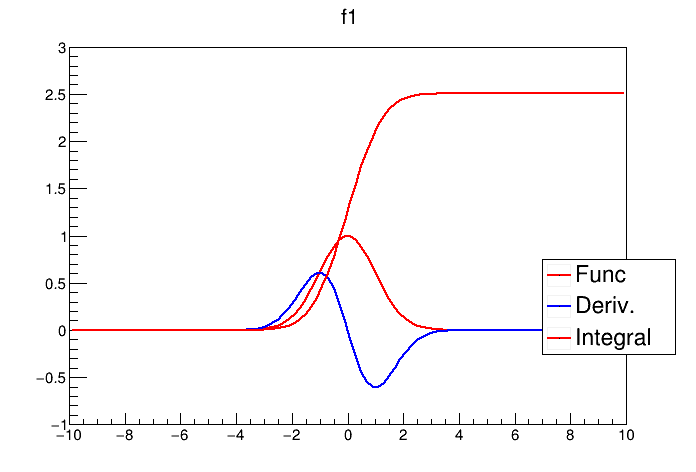

In [9]:
gROOT->GetListOfCanvases()->Draw()